In [1]:
import pyNN.nest as sim
from pyNN.random import RandomDistribution, NumpyRNG
import matplotlib.pyplot as plt
import numpy as np
import gym

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH


/usr/local/miniconda3/envs/ml/lib/python3.7/site-packages/pyNN/nest/__init__.py:55: UserWarning: Unable to install NEST extensions. Certain models may not be available.
Further details: DynamicModuleManagementError in Install: Module 'pynn_extensions' could not be opened.
The dynamic loader returned the following error: 'file not found'.

Please check LD_LIBRARY_PATH (OSX: DYLD_LIBRARY_PATH)!
  warnings.warn("Unable to install NEST extensions. Certain models may not be available.\nFurther details: {}".format(err))


In [2]:
def plot_spiketrains(segment):
    for spiketrain in segment.spiketrains:
        y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
        plt.plot(spiketrain, y, '.')
        plt.ylabel(segment.name)
        plt.setp(plt.gca().get_xticklabels(), visible=False)

In [3]:
def plot_membrane_potential(segment):
    n_panels = sum(a.shape[1] for a in segment.analogsignals)
    panel = 1
    for signal in segment.analogsignals:
        for index in range(signal.shape[1]):
            plt.subplot(n_panels, 1, panel)
            label = "Neuron %d" % signal.annotations['source_ids'][index]
            plt.plot(signal.times, signal[:, index], label=label)
            plt.ylabel("%s (%s)" % (signal.name, signal.units._dimensionality.string))
            plt.setp(plt.gca().get_xticklabels(), visible=False)
            plt.legend()

            panel+=1

In [4]:
sim.setup()

cells = sim.Population(4, sim.IF_curr_exp())

current_sources = [sim.DCSource(amplitude=1, start=50.0, stop=400.0),
                   sim.StepCurrentSource(times=[50.0, 210.0, 250.0, 410.0],
                                         amplitudes=[0.4, 1, -0.2, 0.2]),
                   sim.ACSource(start=50.0, stop=450.0, amplitude=1,
                                offset=0.1, frequency=10.0, phase=0.0),
                   sim.NoisyCurrentSource(mean=0.8, stdev=0.2, start=50.0,
                                          stop=450.0, dt=1.0)]

for cell, current_source in zip(cells, current_sources):
    cell.inject(current_source)

cells.record(('v', 'spikes'))

sim.run(500.0)
cells_output = cells.get_data()
sim.end()

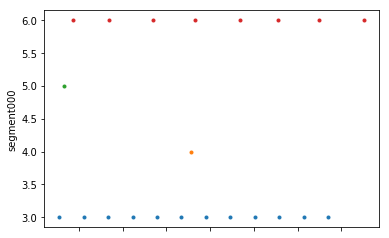

In [5]:
plot_spiketrains(cells_output.segments[0])

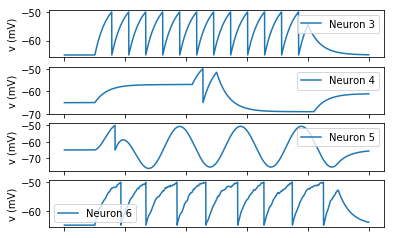

In [6]:
plot_membrane_potential(cells_output.segments[0])

## Test effect of weights on a simple two layer network

In [26]:
sim.setup()

inpt = sim.Population(2, sim.IF_curr_exp())
outpt = sim.Population(2, sim.IF_curr_exp())

syn = sim.StaticSynapse(weight=RandomDistribution('normal', mu=1.0, sigma=1.0, rng=NumpyRNG(seed=15283)))
connections = sim.Projection(inpt, inpt, sim.AllToAllConnector(), syn)
print(connections.get('weight', format='list'))

inpt.record(('v', 'spikes'))
outpt.record(('v', 'spikes'))

currents = [sim.StepCurrentSource(times=[50.0, 150.0, 350.0, 550.0],
                                         amplitudes=[1, 0., 1.0, 0.0]),
          sim.StepCurrentSource(times=[200.0, 300.0, 350., 550.],
                                         amplitudes=[1.0, 0.0, 1.0, 0.0])]


for cell, current_source in zip(inpt, currents):
    cell.inject(current_source)

sim.run(600.0)
inpt_data = inpt.get_data()
outpt_data = outpt.get_data()
sim.end()

[(0.0, 0.0, -1.5480120988706811), (0.0, 1.0, 1.374862897463366), (1.0, 0.0, 2.077657395942121), (1.0, 1.0, 0.7044771605190507)]


In [27]:
inpt_data.segments[0].spiketrains[0].shape[0] / 0.6

23.333333333333336

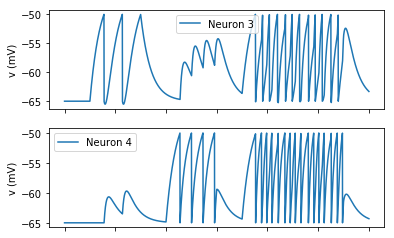

In [29]:
plot_membrane_potential(inpt_data.segments[0])

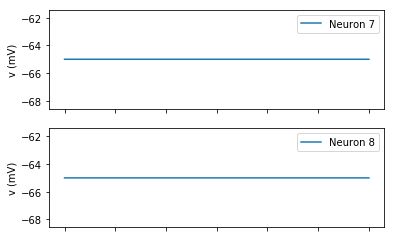

In [30]:
plot_membrane_potential(outpt_data.segments[0])

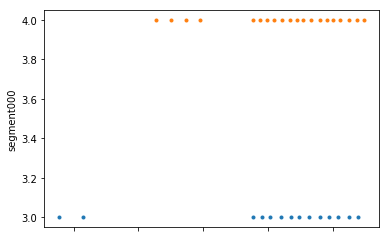

In [31]:
plot_spiketrains(inpt_data.segments[0])

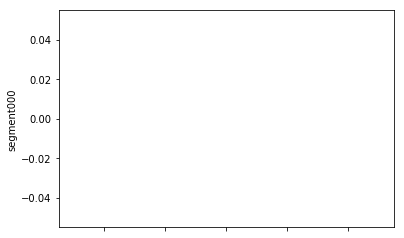

In [32]:
plot_spiketrains(outpt_data.segments[0])

In [33]:
sim.setup()
cells = sim.Population(1, sim.IF_curr_exp())

for i in range(100):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-33-52daf86756f1>, line 5)